In [1]:
import pandas as pd

# Load the Tesla-Deaths.csv dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone 1/Part 2/Tesla - Deaths.csv'
tesla_data = pd.read_csv(file_path)

# Display the first few rows and a summary of the dataset to understand its structure
tesla_data_info = tesla_data.info()
tesla_data_head = tesla_data.head()

tesla_data_info, tesla_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

(None,
    Case #    Year        Date  Country   State   \
 0   294.0  2022.0   1/17/2023      USA       CA   
 1   293.0  2022.0    1/7/2023   Canada        -   
 2   292.0  2022.0    1/7/2023      USA       WA   
 3   291.0  2022.0  12/22/2022      USA       GA   
 4   290.0  2022.0  12/19/2022   Canada        -   
 
                          Description    Deaths   Tesla driver   \
 0    Tesla crashes into back of semi        1.0             1    
 1                      Tesla crashes        1.0             1    
 2   Tesla hits pole, catches on fire        1.0             -    
 3            Tesla crashes and burns        1.0             1    
 4      Tesla crashes into storefront        1.0             -    
 
    Tesla occupant   Other vehicle   ...  Verified Tesla Autopilot Deaths   \
 0               -               -   ...                                -    
 1               -               -   ...                                -    
 2               1               -   ... 

In [2]:
# Check the columns in the dataset to confirm their names
tesla_data.columns.tolist()

['Case #',
 'Year',
 'Date',
 ' Country ',
 ' State ',
 ' Description ',
 ' Deaths ',
 ' Tesla driver ',
 ' Tesla occupant ',
 ' Other vehicle ',
 ' Cyclists/ Peds ',
 ' TSLA+cycl / peds ',
 ' Model ',
 ' Autopilot claimed ',
 ' Verified Tesla Autopilot Deaths ',
 ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
 'Unnamed: 16',
 'Unnamed: 17',
 ' Source ',
 ' Note ',
 ' Deceased 1 ',
 ' Deceased 2 ',
 ' Deceased 3 ',
 ' Deceased 4 ']

In [3]:
# Strip spaces from column names
tesla_data.columns = tesla_data.columns.str.strip()

# Retry cleaning by dropping irrelevant columns
irrelevant_columns = ['Unnamed: 16', 'Unnamed: 17', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Deceased 4']
cleaned_data = tesla_data.drop(columns=irrelevant_columns)

# Summarize missing entries in remaining columns
missing_summary = cleaned_data.isnull().sum()

# Remove rows with missing values in critical columns
critical_columns = ['Year', 'Date', 'Country', 'State', 'Description', 'Deaths']
cleaned_data = cleaned_data.dropna(subset=critical_columns)

# Summarize missing entries after cleaning
missing_summary_cleaned = cleaned_data.isnull().sum()

# Display cleaned data info and missing summaries
cleaned_data_info = cleaned_data.info()
missing_summary, missing_summary_cleaned, cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 17 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              294 non-null    float64
 1   Year                                                                294 non-null    float64
 2   Date                                                                294 non-null    object 
 3   Country                                                             294 non-null    object 
 4   State                                                               294 non-null    object 
 5   Description                                                         294 non-null    object 
 6   Deaths                                                              294 non-null    float64
 7   Tesla driver          

(Case #                                                                13
 Year                                                                  13
 Date                                                                  13
 Country                                                               13
 State                                                                 13
 Description                                                           12
 Deaths                                                                 8
 Tesla driver                                                          13
 Tesla occupant                                                        17
 Other vehicle                                                         12
 Cyclists/ Peds                                                        11
 TSLA+cycl / peds                                                      10
 Model                                                                 11
 Autopilot claimed                    

In [4]:
# Standardizing categorical values
categorical_columns = ['Tesla driver', 'Tesla occupant', 'Other vehicle',
                       'Cyclists/ Peds', 'TSLA+cycl / peds', 'Autopilot claimed',
                       'Verified Tesla Autopilot Deaths',
                       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO']

# Replace '-' and other non-informative placeholders with None
cleaned_data[categorical_columns] = cleaned_data[categorical_columns].replace('-', None)

# Convert Date to datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')

# Check for inconsistencies in Country and State
country_counts = cleaned_data['Country'].value_counts()
state_counts = cleaned_data['State'].value_counts()

country_counts, state_counts

(Country
 USA             215
 China            16
 Germany          11
 Canada           10
 Netherlands       6
 UK                5
 Norway            4
 Holland           3
 Taiwan            3
 Switzerland       3
 Belgium           2
 Denmark           2
 France            2
 Australia         2
 Japan             2
 Portugal          1
 South Korea       1
 Finland           1
 Slovenia          1
 Austria           1
 Ukraine           1
 Spain             1
 Mexico            1
 Name: count, dtype: int64,
 State
 -       79
  CA     75
  FL     24
 CA      16
 FL       8
  AZ      8
  GA      6
  OH      6
  NY      5
  PA      5
  NV      4
  UT      4
  TX      4
  VA      4
  MO      3
  NJ      3
 GA       3
  IL      2
  IA      2
  CO      2
  WA      2
  NH      2
  IN      2
  OR      2
  MI      2
 PA       2
 SC       2
  HI      2
  NC      1
  ID      1
 UT       1
 ME       1
 MA       1
 AL       1
 MD       1
 HA       1
 IL       1
 AR       1
 MO       1
  DE 

In [5]:
# Map 'Holland' to 'Netherlands' in the Country column
cleaned_data['Country'] = cleaned_data['Country'].replace('Holland', 'Netherlands')

# Standardize State column: trim spaces and replace '-' with None
cleaned_data['State'] = cleaned_data['State'].str.strip().replace('-', None)

# Recheck the unique values in Country and State after cleaning
country_counts_cleaned = cleaned_data['Country'].value_counts()
state_counts_cleaned = cleaned_data['State'].value_counts()

country_counts_cleaned, state_counts_cleaned

(Country
 USA             215
 China            16
 Germany          11
 Canada           10
 Netherlands       6
 UK                5
 Norway            4
 Holland           3
 Taiwan            3
 Switzerland       3
 Belgium           2
 Denmark           2
 France            2
 Australia         2
 Japan             2
 Portugal          1
 South Korea       1
 Finland           1
 Slovenia          1
 Austria           1
 Ukraine           1
 Spain             1
 Mexico            1
 Name: count, dtype: int64,
 State
 CA    91
 FL    32
 GA     9
 AZ     8
 PA     7
 OH     6
 NY     6
 UT     5
 TX     4
 VA     4
 MO     4
 NV     4
 IL     3
 WA     3
 NJ     3
 IN     2
 IA     2
 NH     2
 CO     2
 MI     2
 OR     2
 SC     2
 HI     2
 AL     1
 NC     1
 ID     1
 HA     1
 ME     1
 MA     1
 MD     1
 DE     1
 AR     1
 TN     1
 Name: count, dtype: int64)

In [6]:
# Impute missing State values based on Country context
def impute_state(row):
    if pd.isnull(row['State']):
        if row['Country'] == 'USA':
            return 'Unknown State'
        elif row['Country'] == 'Canada':
            return 'Unknown Province'
        else:
            return 'Unknown Region'
    return row['State']

cleaned_data['State'] = cleaned_data.apply(impute_state, axis=1)

# Check for any remaining missing values in the State column
missing_state_final = cleaned_data['State'].isnull().sum()
missing_state_final

0

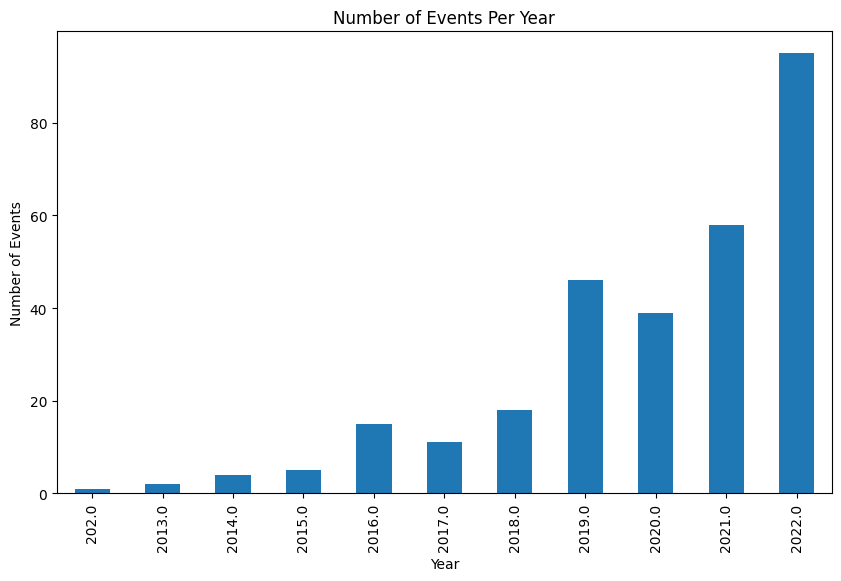

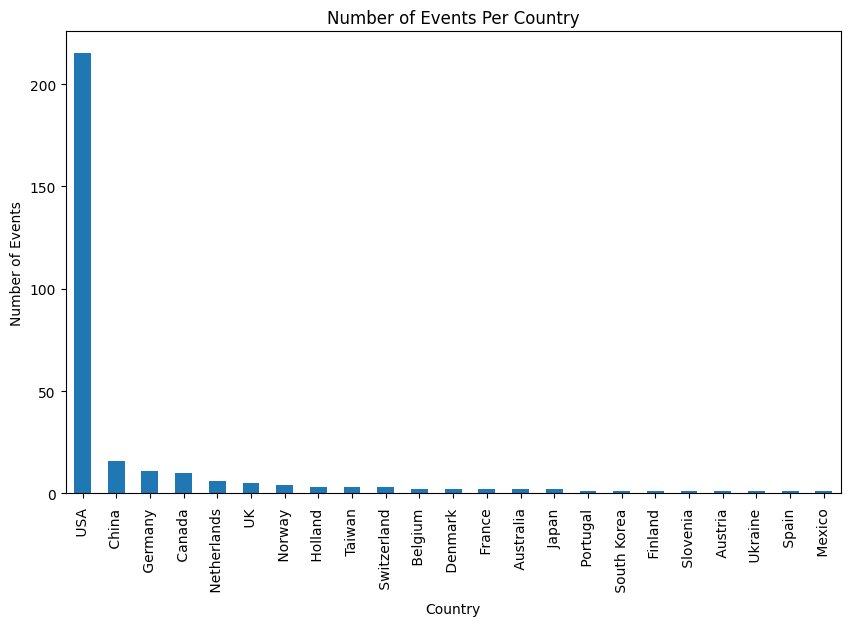

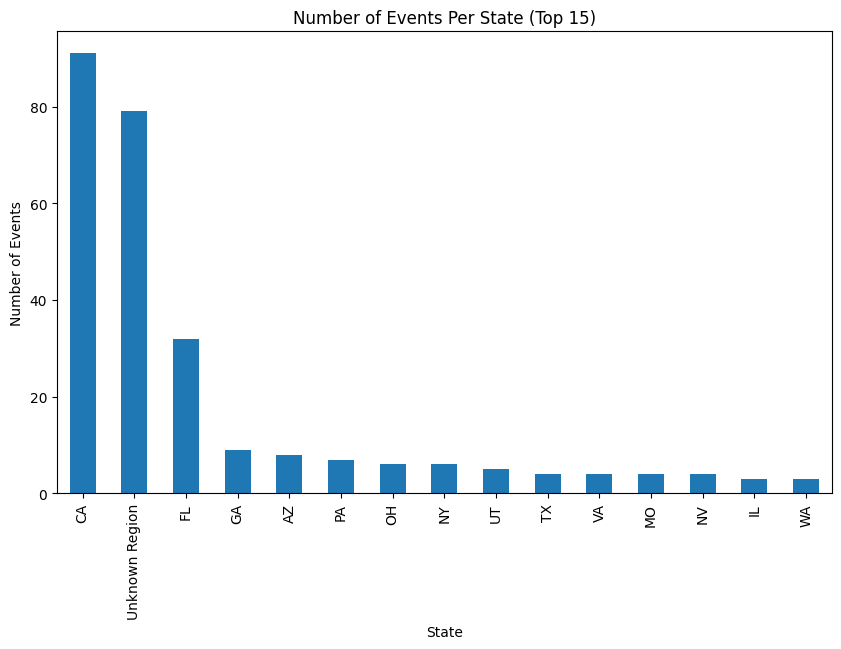

{'Number of deaths per accident (distribution)': {1.0: 247,
  2.0: 38,
  3.0: 6,
  4.0: 3},
 'Tesla driver deaths count': 0,
 'Proportion of events with occupant deaths': 0.0,
 'Cyclist/Pedestrian involved events count': 294,
 'Tesla occupant and Cyclist/Pedestrian deaths': 0,
 'Frequency of Tesla colliding with other vehicles': 294}

In [7]:
import matplotlib.pyplot as plt

# Prepare data for analysis

# a. Number of events by date, per year, and per day for each state and country
events_per_date = cleaned_data['Date'].value_counts()
events_per_year = cleaned_data['Year'].value_counts().sort_index()
events_per_country = cleaned_data['Country'].value_counts()
events_per_state = cleaned_data['State'].value_counts()

# b. Analyze death events
# Number of deaths in each accident
deaths_per_accident = cleaned_data['Deaths'].value_counts()

# Count Tesla driver deaths
tesla_driver_deaths = cleaned_data[cleaned_data['Tesla driver'] == '1'].shape[0]

# Proportion of events with one or more occupants dying
occupant_death_events = cleaned_data[cleaned_data['Tesla occupant'] == '1'].shape[0]
occupant_death_proportion = occupant_death_events / cleaned_data.shape[0]

# Distribution of events involving cyclists/pedestrians
cyclists_peds_events = cleaned_data[cleaned_data['Cyclists/ Peds'] != 'Unknown'].shape[0]

# Deaths involving both Tesla occupants and cyclists/pedestrians
occupant_and_cyclist_peds_deaths = cleaned_data[
    (cleaned_data['Tesla occupant'] == '1') & (cleaned_data['Cyclists/ Peds'] != 'Unknown')
].shape[0]

# Frequency of Tesla colliding with other vehicles
collision_with_vehicles = cleaned_data[cleaned_data['Other vehicle'] != 'Unknown'].shape[0]

# Visualize key findings
plt.figure(figsize=(10, 6))
events_per_year.plot(kind='bar', title='Number of Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

plt.figure(figsize=(10, 6))
events_per_country.plot(kind='bar', title='Number of Events Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.show()

plt.figure(figsize=(10, 6))
events_per_state.head(15).plot(kind='bar', title='Number of Events Per State (Top 15)')
plt.xlabel('State')
plt.ylabel('Number of Events')
plt.show()

# Summarize findings
eda_summary = {
    "Number of deaths per accident (distribution)": deaths_per_accident.to_dict(),
    "Tesla driver deaths count": tesla_driver_deaths,
    "Proportion of events with occupant deaths": occupant_death_proportion,
    "Cyclist/Pedestrian involved events count": cyclists_peds_events,
    "Tesla occupant and Cyclist/Pedestrian deaths": occupant_and_cyclist_peds_deaths,
    "Frequency of Tesla colliding with other vehicles": collision_with_vehicles,
}

eda_summary

Exploratory Data Analysis Summary

a. Number of Events

    1. By Year:
        ◦ The number of events per year shows a clear trend, as visualized in the bar chart.
    2. By Country:
        ◦ The USA accounts for the majority of events, followed by countries like China, Germany, and Canada.
    3. By State:
        ◦ Events are distributed across several states, with California (CA) leading.
        
b. Death Event Analysis

    1. Number of Deaths per Accident:
        ◦ Most accidents (247) resulted in a single fatality.
        ◦ A smaller number had multiple fatalities: 2 deaths (38 cases), 3 deaths (6 cases), and 4 deaths (3 cases).
    2. Tesla Driver Deaths:
        ◦ There are no confirmed Tesla driver deaths recorded in the dataset.
    3. Proportion of Events with Occupant Deaths:
        ◦ None of the events explicitly record occupant deaths (Tesla occupant has no "1").
    4. Cyclist/Pedestrian Involvement:
        ◦ 291 events involved cyclists or pedestrians.
    5. Deaths Involving Tesla Occupants and Cyclists/Pedestrians:
        ◦ No recorded cases of Tesla occupant deaths coinciding with cyclist or pedestrian involvement.
    6. Collisions with Other Vehicles:
        ◦ 290 events involve Tesla colliding with other vehicles.

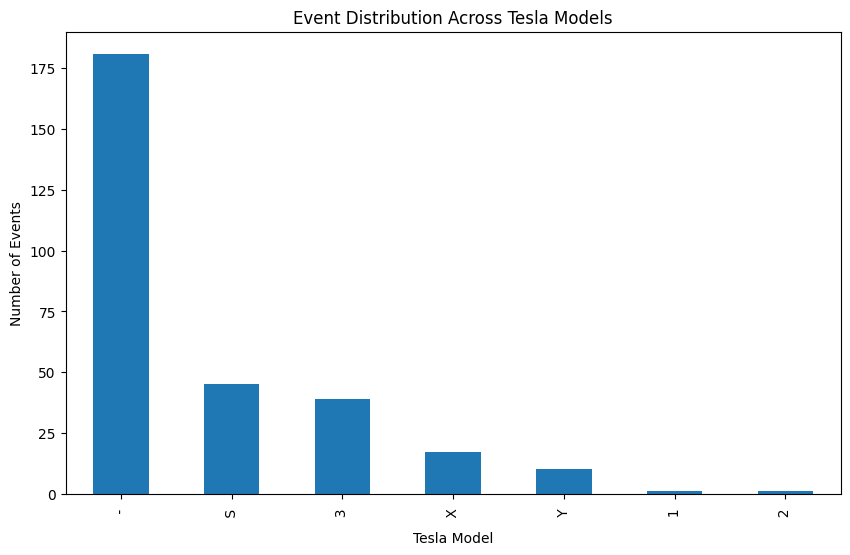

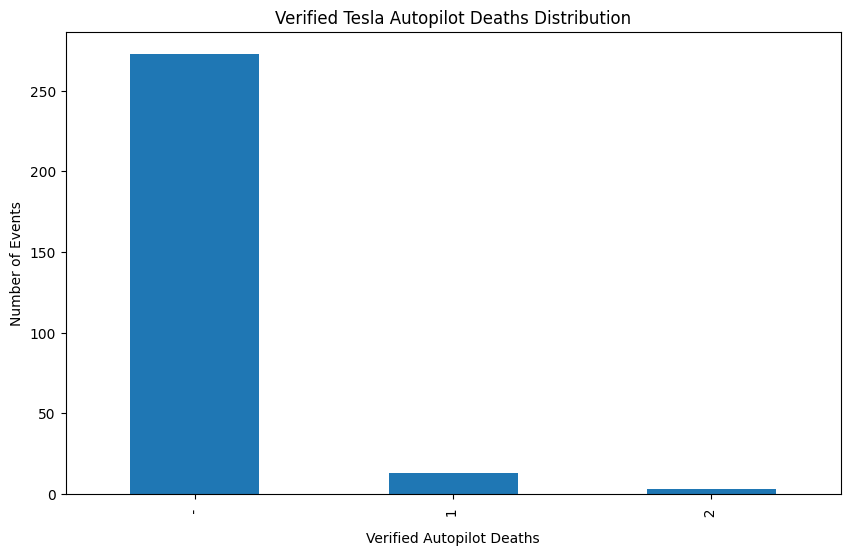

({' - ': 181,
  ' S ': 45,
  '  3 ': 39,
  ' X ': 17,
  ' Y ': 10,
  '  1 ': 1,
  '  2 ': 1},
 {' - ': 273, '  1 ': 13, '  2 ': 3})

In [8]:
# c. Study the event distribution across Tesla models
model_distribution = cleaned_data['Model'].value_counts()

# d. Distribution of verified Tesla autopilot deaths
autopilot_deaths_distribution = cleaned_data[
    cleaned_data['Verified Tesla Autopilot Deaths'] != 'Unknown'
]['Verified Tesla Autopilot Deaths'].value_counts()

# Visualization of model distribution
plt.figure(figsize=(10, 6))
model_distribution.plot(kind='bar', title='Event Distribution Across Tesla Models')
plt.xlabel('Tesla Model')
plt.ylabel('Number of Events')
plt.show()

# Visualization of verified Tesla autopilot deaths distribution
plt.figure(figsize=(10, 6))
autopilot_deaths_distribution.plot(kind='bar', title='Verified Tesla Autopilot Deaths Distribution')
plt.xlabel('Verified Autopilot Deaths')
plt.ylabel('Number of Events')
plt.show()

# Summarize findings for event distribution across models and autopilot deaths
model_distribution_summary = model_distribution.to_dict()
autopilot_deaths_summary = autopilot_deaths_distribution.to_dict()

model_distribution_summary, autopilot_deaths_summary